In [1]:
import pandas as pd

In [2]:
train_data=pd.read_excel(r"C:\Users\HP-PC\Downloads\Flight_Fare_Prediction_DataSet.xlsx")

In [3]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.drop(index=9039,axis=0,inplace=True) #another way of dropping-->train_data.dropna(inplace=True)

In [8]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
copy_df=train_data.copy() # making copy of a org DF and will do manipulation on copy DF

In [11]:
copy_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
copy_df.dtypes # we can see from above Date_of_Journey,Dep_Time,Arrival_Time is object whereas they must DataTime datatype therefore we will change the data type

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_into_DateTime(col):
    copy_df[col]=pd.to_datetime(copy_df[col])

In [14]:
copy_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
import warnings
warnings.filterwarnings("ignore")
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_DateTime(feature)
    #print(type(feature))

In [16]:
copy_df.dtypes #now data type of above three has changed

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
#Now Date_Of_journey is in DD-MM-YYYY format so we will extract date month and year from it.....dt is a DataFrame object.
copy_df["Date_of_Journey_Year"]=copy_df["Date_of_Journey"].dt.year #extracting year
copy_df["Date_of_Journey_Month"]=copy_df["Date_of_Journey"].dt.month #extracting month
copy_df["Date_of_Journey_Day"]=copy_df["Date_of_Journey"].dt.day #extracting day

In [18]:
copy_df.head(3) # Three new columns added in the data frame

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-22 05:50:00,2022-10-22 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-22 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6


In [19]:
copy_df.drop("Date_of_Journey",axis=1,inplace=True) #Since we extracted Day Month and Year so will drop DOJ

In [20]:
copy_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-22 05:50:00,2022-10-22 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5


In [21]:
copy_df.dtypes  #Now below we can see that Dep_Time and Arr_Time is Object datatype therefore if we want to extract hour and min it won't be allowed


Airline                          object
Source                           object
Destination                      object
Route                            object
Dep_Time                 datetime64[ns]
Arrival_Time             datetime64[ns]
Duration                         object
Total_Stops                      object
Additional_Info                  object
Price                             int64
Date_of_Journey_Year              int64
Date_of_Journey_Month             int64
Date_of_Journey_Day               int64
dtype: object

In [22]:
#Calling change_Datetime func to change DataType
for feature in ["Dep_Time","Arrival_Time"]:
    change_into_DateTime(feature)

In [23]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10682 non-null  object        
 1   Source                 10682 non-null  object        
 2   Destination            10682 non-null  object        
 3   Route                  10682 non-null  object        
 4   Dep_Time               10682 non-null  datetime64[ns]
 5   Arrival_Time           10682 non-null  datetime64[ns]
 6   Duration               10682 non-null  object        
 7   Total_Stops            10682 non-null  object        
 8   Additional_Info        10682 non-null  object        
 9   Price                  10682 non-null  int64         
 10  Date_of_Journey_Year   10682 non-null  int64         
 11  Date_of_Journey_Month  10682 non-null  int64         
 12  Date_of_Journey_Day    10682 non-null  int64         
dtypes

In [24]:
copy_df["Dep_Time_Hour"]=copy_df["Dep_Time"].dt.hour #extracting hour
copy_df["Dep_Time_Minute"]=copy_df["Dep_Time"].dt.minute #extracting minute
copy_df["Arrival_Time_Hour"]=copy_df["Arrival_Time"].dt.hour #extracting hour
copy_df["Arrival_Time_Minute"]=copy_df["Arrival_Time"].dt.minute #extracting minute


In [25]:
copy_df.head(2) #After this we can drop Dep_Time and Arrival_Time as they are of no use.

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-22 05:50:00,2022-10-22 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [26]:
#Above is normal statement for extracting.PFB function for extracting,dropping respective column and return .head() rows also

def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [27]:
extract_hour_min(copy_df,'Dep_Time')
extract_hour_min(copy_df,"Arrival_Time")

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,5,50,13,15


In [28]:
#Lets Analyse when most of the flights will take off like Evening,Morning etc.

In [29]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    else:
        return "Night"

<AxesSubplot:>

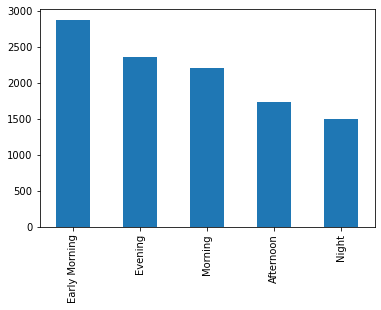

In [30]:
copy_df["Dep_Time_Hour"].apply(flight_dep_time).value_counts().plot(kind="bar") 
#.apply() will apply the function-->flight_dep_time and .value_counts() gives the count for each time.  .plot() is of pandas plot
#.plot() makes the static chart.

In [31]:
#In above bar graph on hovering bars values are not reflecting there will plot new plot.
#Plotly and Cufflinks will be used.They are typically used to make plot more interactive.

In [32]:
#!pip install cufflinks -->installing cufflinks module
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot #iplot is i python plot makes dyanamic and interactive charts.
#plotlyjs is a javascript class which makes the plot more user friendly.
#init_notebook_mode will end making plot in this ipython notebook.

In [33]:
cf.go_offline()

In [34]:
copy_df["Dep_Time_Hour"].apply(flight_dep_time).value_counts().iplot(kind="bar",color='purple') 
#iplot() uses the cufflinks wrapper over plotly that runs matplotlib under the whole. 
#Through iplot() makes the plot dyanamic and interactive.
#For making plot interactive plotly() and cufflinks() comes into the picture.

In [35]:
#Pre processing Duration Feature and extracting meaningful features from it.
#Duration features combines hour and minutes and machine cannot understand therefore we will separate hours and minutes from it.

In [36]:
copy_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35,16,50,21,35


In [37]:
#In above for index 3 we have 19h no minutes likewise many data will be therefore we need to preprocess it.

In [38]:
def preprocess_duration(x):
    if 'h' not in x:
        return '0h '+x
    elif 'm' not in x:
        return x+' 0m'
    else:
        return x

In [39]:
copy_df["Duration"]=copy_df["Duration"].apply(preprocess_duration)
#now below we can see 0m got concatenated with 19.


In [40]:
copy_df["Duration"].head()

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [41]:
copy_df["Duration"][0]

'2h 50m'

In [42]:
copy_df["Duration"][0].split() #hour and minute got separated in a list

['2h', '50m']

In [43]:
copy_df["Duration"][0].split(' ')[0] # hour separated out.But it is instring 'h' subscript is also there.Therefore will convert in int

'2h'

In [44]:
copy_df["Duration"][0].split(' ')[1]

'50m'

In [45]:
int(copy_df["Duration"][0].split(' ')[0][0:-1]) 
#h got removed.[0:-1] slicing from 0 to last-1.Therefore only 2 will come.
#at starting we made int type casting (copy_df["Duration"][0].split(' ')[0][0:-1])  this func will give o/p as a string therefore we will convert it into int.

2

In [46]:
int(copy_df["Duration"][0].split(' ')[1][0:-1]) #m got removed.[0:-1] slicing from 0 to last-1.Therefore only 50 will come.

50

In [47]:
copy_df["Duration_Hours"]=copy_df["Duration"].apply(lambda x:x.split(' ')[0][0:-1])
#Giving all hours number
#Applying anonymous func calles lambda. 
#Perform operation according to x.split(' ')[0][0:-1] and then store at x which is written just after lambda.

In [48]:
copy_df["Duration_Mins"]=copy_df["Duration"].apply(lambda x:x.split(' ')[1][0:-1])

In [49]:
copy_df.head()
#copy_df.dtypes

#Atlast Duration_Hours and Duraytion_Mins got added.

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,...,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,...,22,20,1,10,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,...,5,50,13,15,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,9,...,9,25,4,25,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,...,18,5,23,30,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,...,16,50,21,35,16,50,21,35,4,45


# Analysing whether Duration impacts the price or not


In [50]:
#Duration is like 2h 50m so total 170 mins will be there.
#Therefore we will replace 'h' with 60,'m' with 1 and " " with + as between 2h 50m there is space.
#Ex-->2h 50m =170 min

In [51]:
'2*60+50*1' #entries in the Duration featur is of string therefore it will be executed as a string.

'2*60+50*1'

In [52]:
#eval() -->It converts into int.
eval('2*60+50*1')
#type(eval('2*60+50*1'))

170

In [53]:
copy_df["Duration_Total_Mins"]=copy_df["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
copy_df["Duration_Total_Mins"].head() #All values got converted into minutes

0     170
1     445
2    1140
3     325
4     285
Name: Duration_Total_Mins, dtype: int64

In [54]:
copy_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,...,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Duration_Total_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,...,20,1,10,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,...,50,13,15,5,50,13,15,7,25,445


In [55]:
#copy_df.dtypes
#Now TotalDuration and Price are in numerical nature therefore by scatter plot we can determine whether duration impacts price or not

In [56]:
import matplotlib.pyplot as plt

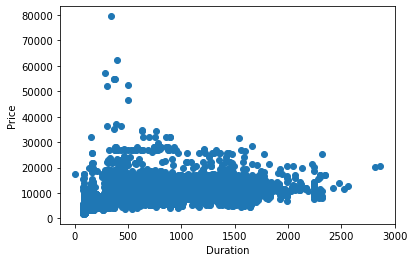

In [57]:
plt.scatter(copy_df["Duration_Total_Mins"],copy_df["Price"])
plt.xlabel("Duration")
plt.ylabel('Price')
plt.show()

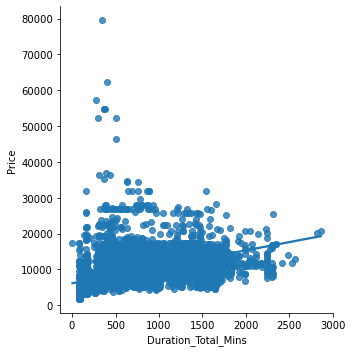

In [58]:
#We can use lmplot also which has regression line below scatter plot
import seaborn as sns
sns.lmplot(x="Duration_Total_Mins",y='Price',data=copy_df)

In [59]:
#From above we can see as the duration Inc Price also Inc.

###  Which city has maximum final destination of flights.

In [60]:
copy_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [61]:
copy_df["Destination"].value_counts()
#One problem in the dataset is that two cities named Delhi and New Delhi is there.

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [62]:
copy_df["Destination"]=copy_df["Destination"].replace('New Delhi',"Delhi")

<AxesSubplot:ylabel='Destination'>

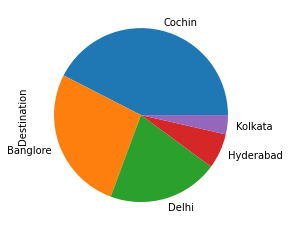

In [63]:
copy_df["Destination"].value_counts().plot(kind='pie') 

#### Finding on which routes Jet  Airways is extremely used

In [64]:
copy_df[copy_df['Airline']=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

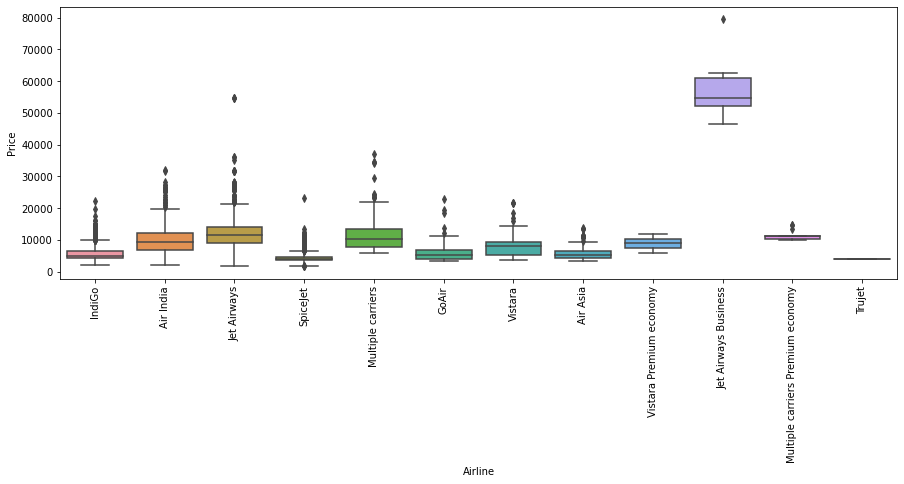

In [65]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Airline",y="Price",data=copy_df)
#Name in x-axis are getting overlapped therefore use xticks
plt.xticks(rotation='vertical')
#From below we can see that Jet Airways Business is most expensive compared to others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

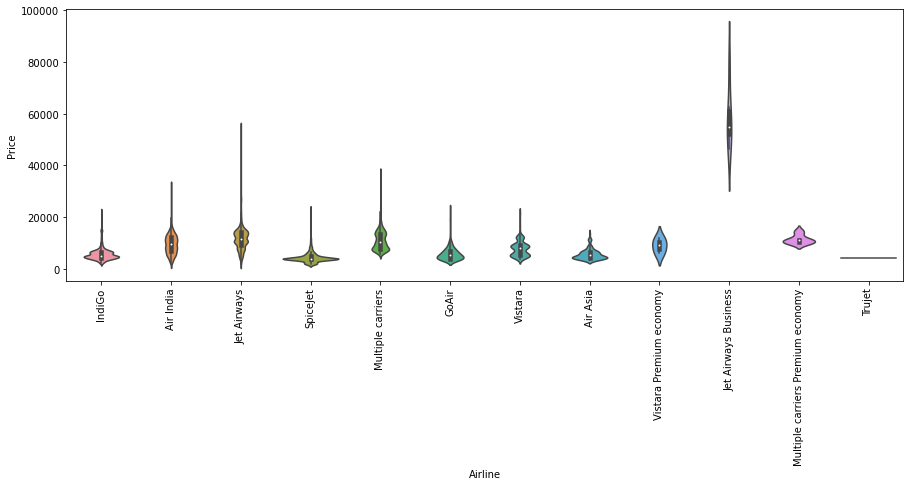

In [66]:
#For better visualisation use Violin plot-->It gives Boxplot+Distribution of feature or data.
plt.figure(figsize=(15,5))
sns.violinplot(x="Airline",y="Price",data=copy_df)
plt.xticks(rotation='vertical')

In [67]:
import numpy as np
np.round(copy_df["Additional_Info"].value_counts(normalize=True)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [68]:
copy_df.head(3) 

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,...,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Duration_Total_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,...,20,1,10,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,...,50,13,15,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,9,...,25,4,25,9,25,4,25,19,0,1140


##### Additional_info,Route,Duration_Total_mins,Journey_Year these features are of no use for ML

In [69]:
copy_df.drop(columns=['Route','Date_of_Journey_Year','Duration_Total_Mins','Additional_Info'],axis=1,inplace=True) #Journey Year dropping because all datapoints are of 2019

In [70]:
copy_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,9,25,4,25,19,0


#### Extracting categorical and numerical features

In [71]:
cat_col=[col for col in copy_df.columns if copy_df[col].dtype=='object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Duration',
 'Total_Stops',
 'Duration_Hours',
 'Duration_Mins']

In [72]:
num_col=[col for col in copy_df.columns if copy_df[col].dtype=='int64']
num_col

['Price',
 'Date_of_Journey_Month',
 'Date_of_Journey_Day',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

## Applying one-hot encoding.

In [73]:
#Since Machine can't understand what is Bangalore,Kolkata etc therefore we will encode(vectorization)

copy_df["Source"].apply(lambda x: 1 if x=='Banglore' else 0)
#All the values are made to one where Source is Banglore

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [74]:
for category in copy_df["Source"].unique():
    copy_df["Source_"+category]=copy_df["Source"].apply(lambda x: 1 if x==category else 0)

In [75]:
#copy_df.head(2)


In [76]:
#Imp Note--> Above encoding done from scratch and generally company asks about it.
#From scikit module we can also do it

In [77]:
#Similarly destination encoding is done
#for category in copy_df["Destination"].unique():
    #copy_df["Destination_"+category]=copy_df["Destination"].apply(lambda x: 1 if x==category else 0)

In [78]:
copy_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,3897,3,24,22,20,...,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,...,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,...,25,4,25,19,0,0,0,1,0,0


##### Problem of one-hot encoding is suppose there are 1000 cities in the dataset then 999 features will be generated which creates complexity to learn machine this is known as 'Curse of Dimensionality' therefore to overcome this problem we can use Target Guided Encoding,

##### Calculate Average price of flight for each city and rank accordingly.Suppose Delhi Avg. Price is 15k Mumbai is 18k then Delhi is 2 and Mumbai's rank is 1.

### Target Guided Encoding

###### Encoding Airline Feature

In [79]:
#Create Dictionary in which key is city and its value is priority(rank which is calculated by Avg. Price)
np.round(copy_df.groupby(['Airline'])['Price'].mean(),2)
#Average price of all arilines is calculated

Airline
Air Asia                              5590.26
Air India                             9612.43
GoAir                                 5861.06
IndiGo                                5673.68
Jet Airways                          11643.92
Jet Airways Business                 58358.67
Multiple carriers                    10902.68
Multiple carriers Premium economy    11418.85
SpiceJet                              4338.28
Trujet                                4140.00
Vistara                               7796.35
Vistara Premium economy               8962.33
Name: Price, dtype: float64

In [80]:
copy_df.groupby(['Airline']).size().sort_values(ascending=False)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [81]:
airlines=copy_df.groupby(['Airline'])['Price'].mean().sort_values().index 
airlines
# .index creates a list datastructure

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [82]:
#Now we will convert airlines in dictionary.Ex-->Key is Trujet its values is 0,Spicejet key is 1 and value is 1 so on so forth.
dict1={key:index for index,key in enumerate(airlines,0)}
dict1
#Code for Dictionary Comprehension

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [83]:
for index,key in enumerate(airlines,0):
    print(index,key)

0 Trujet
1 SpiceJet
2 Air Asia
3 IndiGo
4 GoAir
5 Vistara
6 Vistara Premium economy
7 Air India
8 Multiple carriers
9 Multiple carriers Premium economy
10 Jet Airways
11 Jet Airways Business


In [84]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

##### Now we will map our dictionary to Airline feature

In [85]:
copy_df["Airline"]=copy_df["Airline"].map(dict1)

In [86]:
copy_df["Airline"]
#DataType of Airline has changes from object to int

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [87]:
copy_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [88]:
copy_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,Delhi,2h 50m,non-stop,3897,3,24,22,20,...,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,...,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,...,25,4,25,19,0,0,0,1,0,0


###### Encoding Destination Feature

In [89]:
Destination=np.round(copy_df.groupby(["Destination"])["Price"].mean(),2).sort_values().index
# Creating a list DataStructure

In [90]:
dict2={key:index  for index,key in enumerate(Destination,0)}
#dict1={key:index for index,key in enumerate(airlines,0)}

In [91]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [92]:
copy_df["Destination"]=copy_df["Destination"].map(dict2)

In [93]:
copy_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,...,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,...,50,13,15,7,25,0,1,0,0,0


###### Encoding Total_Stops Feature

In [94]:
copy_df["Total_Stops"]=copy_df["Total_Stops"].replace('non-stop',0).replace('2 stops',2).replace('1 stop',1).replace('3 stops',3).replace('4 stops',4)

In [95]:
copy_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,3,24,22,20,...,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,5,50,...,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,9,6,9,25,...,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,12,5,18,5,...,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,1,3,16,50,...,50,21,35,4,45,1,0,0,0,0


In [96]:
#Another way of encoding
#dict={'non-stop':0,'1 stop':1,'2 stops':2}
#copy_df["Destination"].map(dict)

### Performing Outlier Detection

#### Outliers can be detected by
##### 1.Distribution
##### 2.Histogram
##### 3.Boxplot

In [97]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1) #subplot(3,1) means 3 rows in which each plot will be plotted and 1 column 
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False) 
    #kde parameter is Kernel Distribution Estimator if made false in distplot then it automatically makes histogrom

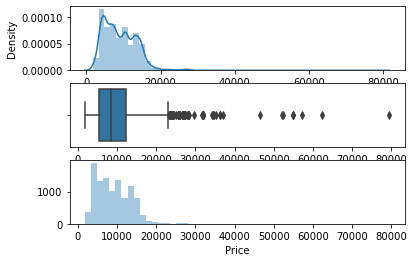

In [98]:
plot(copy_df,'Price')

#### From above plots we can see Outliers therefore where Price>35000 we will replace it with median value of price
##### Note:- We dont replace with mean because mean gets highly affected by outliers

In [99]:
copy_df["Price"]=np.where(copy_df["Price"]>35000,copy_df["Price"].median(),copy_df["Price"])
#np.where function(condition,if true,if false)

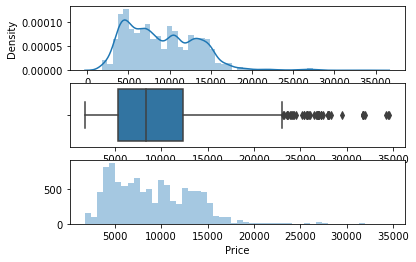

In [100]:
plot(copy_df,'Price')

### Performing Feature Selection

In [101]:
copy_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,3,24,22,20,...,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,...,50,13,15,7,25,0,1,0,0,0


In [102]:
copy_df.drop(columns=["Source",'Duration'],axis=1,inplace=True)

In [103]:
copy_df.head(2)

,Airline,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,3,24,22,20,1,10,...,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,...,50,13,15,7,25,0,1,0,0,0


In [104]:
copy_df.dtypes

Airline                    int64
Destination                int64
Total_Stops                int64
Price                    float64
Date_of_Journey_Month      int64
Date_of_Journey_Day        int64
Dep_Time_Hour              int64
Dep_Time_Minute            int64
Arrival_Time_Hour          int64
Arrival_Time_Minute        int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
Duration_Hours            object
Duration_Mins             object
Source_Banglore            int64
Source_Kolkata             int64
Source_Delhi               int64
Source_Chennai             int64
Source_Mumbai              int64
dtype: object

###### Above we can see that Duration,Duration_Hours,Duration_Mins are of Object and all are in int DataType therefore converting in int

In [105]:
def change_into_int(col):
    copy_df[col]=pd.to_numeric(copy_df[col])

for feature in ["Duration_Hours","Duration_Mins"]:
    change_into_int(feature)
    




In [106]:
copy_df.dtypes

Airline                    int64
Destination                int64
Total_Stops                int64
Price                    float64
Date_of_Journey_Month      int64
Date_of_Journey_Day        int64
Dep_Time_Hour              int64
Dep_Time_Minute            int64
Arrival_Time_Hour          int64
Arrival_Time_Minute        int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
Duration_Hours             int64
Duration_Mins              int64
Source_Banglore            int64
Source_Kolkata             int64
Source_Delhi               int64
Source_Chennai             int64
Source_Mumbai              int64
dtype: object

#### Estimating which feature has the  highest impact on target i.e,Price

##### There are many ways for selecting
###### 1.Select KBest
###### Score --> i)f-regression(interally works like correlation) (ii)mutual_info_regression

In [107]:
from sklearn.feature_selection import mutual_info_regression

In [108]:
#Dropping Price(target variable/Dependent Feature) from DF

In [109]:
X=copy_df.drop(["Price"],axis=1)

In [110]:
y=copy_df["Price"]

In [111]:
X.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Date_of_Journey_Month    int64
Date_of_Journey_Day      int64
Dep_Time_Hour            int64
Dep_Time_Minute          int64
Arrival_Time_Hour        int64
Arrival_Time_Minute      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_Hours           int64
Duration_Mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [112]:
y.dtypes

dtype('float64')

In [113]:
a=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
a.columns=(["Importance"])

In [114]:
a.sort_values(by="Importance",ascending=False)

,Importance
Destination,1.000861
Airline,0.975950
Total_Stops,0.783373
Source_Delhi,0.522123
Duration_Hours,0.467905
Source_Kolkata,0.454813
Arrival_Time_Hour,0.415958
Arrival_Time_hour,0.404860
Source_Banglore,0.383939
Arrival_Time_minute,0.350934


### From above we can clearly see that Destination feature has the highest effect on Price

#### if value between target and feature is 0 that means they are independent

###  Building ML Model

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
ml_model=RandomForestRegressor()

In [119]:
model=ml_model.fit(X_train,y_train)

In [120]:
y_pred=ml_model.predict(x_test)

In [121]:
y_pred.shape

(2137,)

In [122]:
y_test.shape

(2137,)

In [123]:
ml_model.score(x_test,y_test)

0.8066770944279587

#  Saving a model
### Suppose new Data Sets come and we have to predict price instead of writing all data preprocessing,feature encoding and all we can directly run this saved model and predict the price.

In [124]:
#!pip install pickle

In [125]:
import pickle

In [126]:
file=open(r'C:\Users\HP-PC\Downloads\PY/rf_random.pkl','wb')
#wb is write operation in binary mode.
#.pkl is a extention of a file.

In [127]:
pickle.dump(model,file)
#calling dump function and we are dumping our model into a file that we have.
#Check this path-->'C:\Users\HP-PC\Downloads\PY'rf_random.pkl file has been dumped.

#### Opening that dumped file.

In [128]:
model=open('C:/Users/HP-PC/Downloads/PY/rf_random.pkl','rb')
#read binary mode.

In [129]:
forest=pickle.load(model)
#Loading forest model from the model which we have created above

In [130]:
forest.predict(x_test)

array([16663.86      ,  6440.51      ,  8918.26      , ...,
        6646.87      , 12743.51333333, 12802.77233333])

##### From above we can see forest model is created using model which was created earlier and that forest model predicting the x_test.Therefore any new datasets comes then we can directly use this dumped model and directly predict the price of a flight.It reduces data preprocessing,encoding etc. stuffs.

# Evaluation Metric
## There are 4 evaluation metric for Regression model.
### 1.R2 Score
### 2.MSE
### 3.MAE
### 4.MAPE
### 5.RMSE


### We are using MAPE(Mean Absolute Percentage Error)

#### Creating Function for calculating MAPE from scratch as there are no inbuilt function.

In [131]:
#in MAPE E is error which is "what is the predicted value and what is the actual value".

In [132]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100

In [133]:
mape(y_test,y_pred)
#it means there is only 13.40% error in the above built model.

13.385189563155492

# Automating ML Pipeline.

In [134]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training Score {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(x_test)
    print("Predictions are {}".format(y_prediction))
    print("\n")
    #Now we will calculate each evaluation metric
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("R2 Score is {}".format(r2_score))
    print("MSE {}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("MAE {}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("RMSE {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE {}".format(mape(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Training Score 0.9506279622731669
Predictions are [16690.2         6301.12        8777.97       ...  6586.2
 13016.265      12651.44090476]


R2 Score is 0.8069666066934531
MSE 3886783.976498599
MAE 1206.868614688735
RMSE 1971.4928294311899
MAPE 13.367613331273521


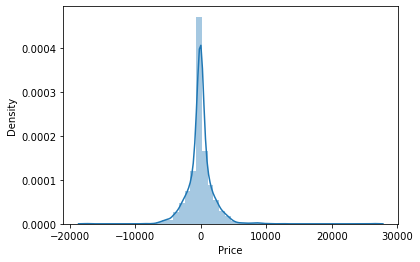

In [135]:
predict(RandomForestRegressor())

### From above plot we can see that at 0 there is a peak which means at most of the incidences this ML model is predicting correctly.

## Hyperparameter Optimization

##### 1.RandomSearchCV-->It is fast because it picks possible values of a parameter in a random way.
##### 2.GridSearch-->little bit slower because it uses P&C to find optimal value.
##### 3.Smote

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
reg_rf=RandomForestRegressor()
#Shift+tab will give what are the parameters for it and accordingly will find the optimal values of it.
#ref_rf initializing the object of the RandomForestRegressor() class.

In [138]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,20]
#np.linspace gives a list with equally divided values.

#### Above all are the parameters and we are giving range of values to find optimal values. 

In [139]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split    
}

In [140]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 20]}

In [141]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
#cv is cross validate=3 which means 3 fold.Determines the cross-validation splitting strategy.
#verbose typically responsible to showcase how your code is running.
#n_jobs-->Number of jobs to run in parallel.

In [142]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [143]:
rf_Random.best_params_

{'n_estimators': 1120,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [144]:
pred2=rf_Random.predict(x_test)

In [145]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8295193219462852

### Initially R2 score was 80% and now due to parameters optimation R2 score improved to 83%